In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.ticker as ticker

In [2]:
%matplotlib inline
import os

In [3]:
data = pd.read_csv("now_with_spotify.csv")
data = data.dropna()
data.head(100)

,speechiness,key,time_signature,liveness,loudness,duration_ms,danceability,duration,valence,acousticness,spotify_id,volume_number,energy,tempo,instrumentalness,mode,number,artist,title
0,0.1400,4.0,4.0,0.0521,-6.055,267267.0,0.891,266,0.820,0.202000,spotify:track:1AWQoqb9bSvzTjaLralEkT,13,0.714,100.972,0.000234,0.0,1,Justin Timberlake,Rock Your Body
1,0.0555,10.0,4.0,0.0853,-5.416,222040.0,0.741,221,0.362,0.039800,spotify:track:7AUfOfYTfiHhgg2Pw1aTpw,13,0.575,93.992,0.127000,0.0,2,Jennifer Lopez,I'm Glad
2,0.2160,3.0,4.0,0.0504,-6.562,205000.0,0.676,203,0.533,0.024100,spotify:track:5UrbZaqIsclBE9IAcnG43M,13,0.561,89.947,0.000000,0.0,3,B2K,Girlfriend
3,0.3010,1.0,4.0,0.0518,-4.857,280053.0,0.691,229,0.877,0.018600,spotify:track:6JW8DqCEOWaj8z5AIx4ugf,13,0.858,92.773,0.000000,1.0,4,Jay-Z,Excuse Me Miss
4,0.2440,5.0,4.0,0.0908,-7.114,268333.0,0.573,218,0.578,0.000290,spotify:track:5DLkPmyenHS2uJclC8nPCA,13,0.606,176.449,0.000000,0.0,5,Ginuwine featuring Baby,Hell Yeah
5,0.3310,6.0,4.0,0.1060,-4.959,251373.0,0.582,237,0.660,0.043800,spotify:track:7tDbbfzB1d52lWP8rq8zRZ,13,0.855,104.963,0.000000,1.0,6,Joe Budden,Pump It Up
6,0.1820,6.0,4.0,0.0666,-3.914,253720.0,0.837,248,0.703,0.103000,spotify:track:2NPxL1QqPrD1a7OLHjVcAP,13,0.885,95.313,0.000000,0.0,7,Nas,I Can
7,0.0356,5.0,4.0,0.2880,-8.443,245063.0,0.677,246,0.184,0.395000,spotify:track:02y3FRLRlmzIpi2y8ZbN2w,13,0.422,130.200,0.000000,0.0,8,Frankie J,Don't Wanna Try
8,0.0318,10.0,4.0,0.1050,-7.705,257160.0,0.682,242,0.264,0.555000,spotify:track:4gJoAvFpDvaeqm2EKYGmhb,13,0.547,120.000,0.000000,1.0,9,Daniel Bedingfield,If You're Not the One
9,0.0557,1.0,4.0,0.2330,-4.346,225427.0,0.685,223,0.852,0.003210,spotify:track:1oJSAzNyTUCm36zhFYMcAZ,13,0.878,88.027,0.000000,1.0,10,Counting Crows featuring Vanessa Carlton,Big Yellow Taxi


In [4]:
heat_data = data.drop(["spotify_id", "artist", "title", "key", "volume_number", "number"], axis=1)

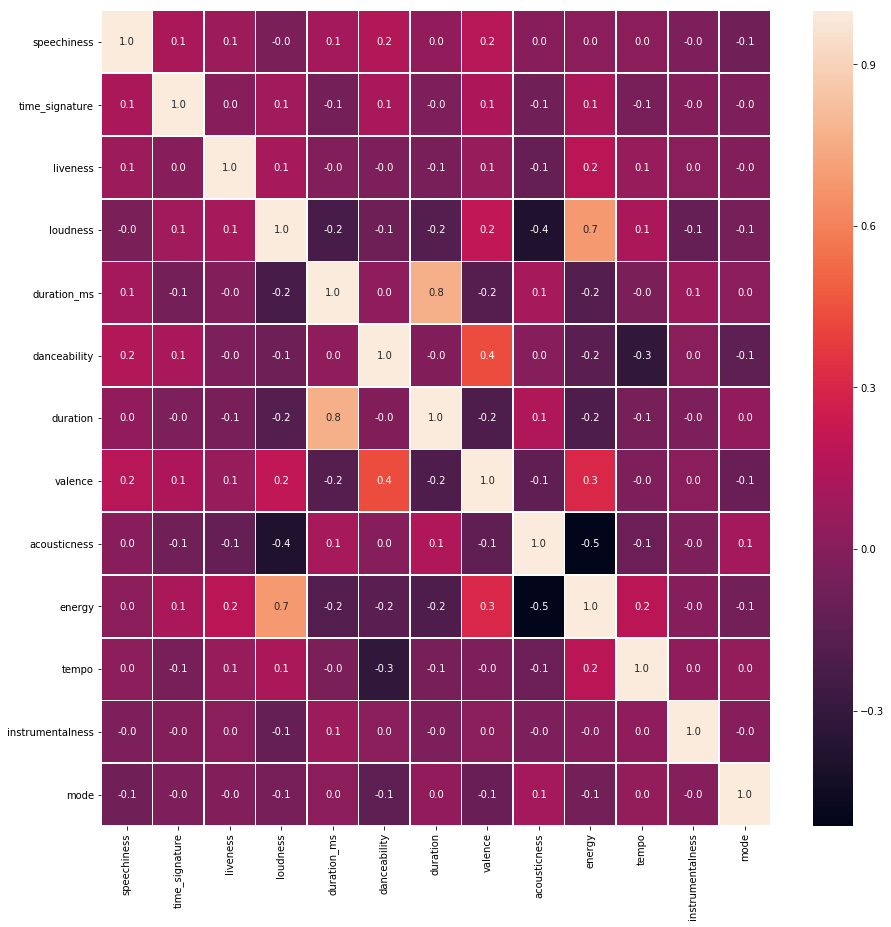

In [5]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(heat_data.corr(), annot=True, linewidths=.7, fmt= '.1f',ax=ax)
plt.savefig('heatmap.png')

In [6]:
# https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/

In [7]:
happy_df = data
happy_df['happy_comp'] = (data['valence']*0.7)+(data['energy']*(-0.25))+(data['liveness']*(-0.25))

happy_df = pd.DataFrame({"Artist": data['artist'], 
                         "Song Title": data['title'],
                         "Spotify ID": data['spotify_id'],
                         "Happy Comp": data['happy_comp']})
happy_df = happy_df.sort_values(by='Happy Comp', ascending=False)
happy_df.head(5)

,Artist,Happy Comp,Song Title,Spotify ID
585,Justin Timberlake featuring Timbaland,0.516775,SexyBack,spotify:track:0O45fw2L5vsWpdsOdXwNAR
623,Kylie Minogue,0.516450,Can't Get You Out of My Head,spotify:track:7MoKXLQeI0Bh2QodCjDO4K
264,Mary J. Blige,0.515375,Family Affair,spotify:track:3aw9iWUQ3VrPQltgwvN9Xu
558,Dave Barnes,0.508300,Little Lies,spotify:track:1NxQeMVFB5VZ1vQEk4lNvd
822,Destiny's Child featuring T.I. and Lil Wayne,0.495825,Soldier,spotify:track:4FTOpNYcGxnQdGNWSxIcio


In [8]:
sad_df = data
sad_df['sad_comp'] = (data['valence']*(-0.5)+(data['acousticness']*0.5))

sad_df = pd.DataFrame({"Artist": data['artist'], 
                         "Song Title": data['title'],
                         "Spotify ID": data['spotify_id'],
                         "Sad Comp": data['sad_comp']})
sad_df = sad_df.sort_values(by='Sad Comp', ascending=False)
sad_df.head(5)

,Artist,Sad Comp,Song Title,Spotify ID
870,Britney Spears,0.4280,Everytime,spotify:track:0dRhSF9LV0HR8Jwd3MMMKJ
307,A Great Big World and Christina Aguilera,0.3887,Say Something,spotify:track:6Vc5wAMmXdKIAM7WUoEb7N
1228,Keith Urban,0.3685,Tonight I Wanna Cry,spotify:track:0BHNSNcbTxQSwxXNnr9oUw
637,Celine Dion,0.3313,A New Day Has Come,spotify:track:1Hck0Y3AgGLIvv9pRuq3ti
709,D.H.T. featuring Edmée,0.3255,Listen to Your Heart,spotify:track:5KqEPvurLuOoV64tNylPO6


In [9]:
angry_df = data
angry_df['angry_comp'] = (data['valence']*(-0.7)+(data['energy']*0.5)+(data['acousticness']*(-0.2)+(data['danceability']*(-0.3))))
        
                        

angry_df = pd.DataFrame({"Artist": data['artist'], 
                         "Song Title": data['title'],
                         "Spotify ID": data['spotify_id'],
                         "Angry Comp": data['angry_comp']})
angry_df = angry_df.sort_values(by='Angry Comp', ascending=False)
angry_df.head(5)

,Angry Comp,Artist,Song Title,Spotify ID
1053,0.245570,Fatboy Slim,The Rockafeller Skank,spotify:track:7mCQK9YB25WZw1saUjfL4e
77,0.229123,Good Charlotte,Hold On,spotify:track:3UyL1yzD5B1nIaFJRs4W8r
281,0.226066,Adema,Giving In,spotify:track:1OGFtaUgHAQjtSk7mhDwr9
1043,0.216184,The Killers,Mr. Brightside,spotify:track:7oK9VyNzrYvRFo7nQEYkWN
57,0.213265,The Ataris,The Boys of Summer,spotify:track:5BmagRD7Thki6O1zZwbxBy


In [10]:
hyper_df = data
hyper_df['hyper_comp'] = (data['valence']*0.25+(data['energy']*0.5)+(data['danceability']*0.25))

hyper_df = pd.DataFrame({"Artist": data['artist'], 
                         "Song Title": data['title'],
                         "Spotify ID": data['spotify_id'],
                         "Hyper Comp": data['hyper_comp'],
                        })
hyper_df = hyper_df.sort_values(by='Hyper Comp', ascending=False)
hyper_df.head(5)

,Artist,Hyper Comp,Song Title,Spotify ID
629,Baha Men,0.92675,Move It Like This,spotify:track:0Odk0MFEwVOTj8sDOPO2Fo
1026,Gwen Stefani,0.91625,Hollaback Girl,spotify:track:6RcQOut9fWL6FSqeIr5M1r
847,Michael Franti & Spearhead featuring Cherine A...,0.91350,Say Hey (I Love You),spotify:track:0nnxf8p851ZR49KFnGWVsB
1092,Aaron Carter,0.90825,Aaron's Party (Come Get It),spotify:track:4fF34Yf5KsfUbCORyLGpEj
583,Nelly Furtado featuring Timbaland,0.90575,Promiscuous,spotify:track:3SwlakM6VX47IwG0Wll5ek


In [11]:
hyper_chart = pd.DataFrame({
                         "Hyper": data['hyper_comp'],
                         "Valence": data['valence'],
                         "Energy": data['energy'],
                         "Danceability": data['danceability'],
                         "Speechiness": data['speechiness'],
                         "Liveliness": data['liveness'],
                         "Loudness": data['loudness'],
                         "Acousticness": data['acousticness'],
                         "Tempo": data['tempo'],
                         "Instrumentalness": data['instrumentalness']
                         
                        })
hyper_chart.head()

,Acousticness,Danceability,Energy,Hyper,Instrumentalness,Liveliness,Loudness,Speechiness,Tempo,Valence
0,0.20200,0.891,0.714,0.78475,0.000234,0.0521,-6.055,0.1400,100.972,0.820
1,0.03980,0.741,0.575,0.56325,0.127000,0.0853,-5.416,0.0555,93.992,0.362
2,0.02410,0.676,0.561,0.58275,0.000000,0.0504,-6.562,0.2160,89.947,0.533
3,0.01860,0.691,0.858,0.82100,0.000000,0.0518,-4.857,0.3010,92.773,0.877
4,0.00029,0.573,0.606,0.59075,0.000000,0.0908,-7.114,0.2440,176.449,0.578


In [12]:
from scipy.stats import zscore
hyper = hyper_chart.apply(zscore)
hyper = hyper.sort_values(by='Hyper', ascending=False)
hyper.head()

,Acousticness,Danceability,Energy,Hyper,Instrumentalness,Liveliness,Loudness,Speechiness,Tempo,Valence
629,0.425302,1.397852,1.609478,2.225238,-0.144394,1.323285,1.644261,0.253902,0.314731,1.584759
1026,1.445855,2.072645,1.191511,2.134320,-0.144351,-1.087542,1.795548,0.016346,-0.405313,1.561895
847,-0.489249,0.760136,1.602947,2.110508,-0.144376,-0.072421,0.579373,0.031116,-1.021753,1.744813
1092,-0.436248,2.250612,0.982527,2.065048,-0.144394,-0.992225,0.700189,0.586234,-0.151376,1.598478
583,-0.400162,1.264377,1.531109,2.043401,-0.143349,-0.167737,-0.339039,-0.457535,-0.248423,1.392695


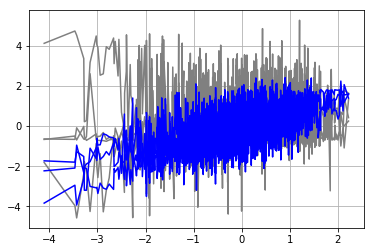

In [13]:
x = hyper['Hyper']
y1 = hyper['Energy']
y2 = hyper['Valence']
y3 = hyper['Danceability']
y4 = hyper['Acousticness']
y5 = hyper['Liveliness']
y6 = hyper['Loudness']
y7 = hyper['Speechiness']
y8 = hyper['Instrumentalness']
y9 = hyper['Tempo']
plt.plot(x, y4, color='grey')
plt.plot(x, y5, color='grey')
plt.plot(x, y6, color='grey')
plt.plot(x, y7, color='grey')
plt.plot(x, y1, color='b')
plt.plot(x, y2, color='b')
plt.plot(x, y3, color='b')
plt.grid(True)
Trait = ['Acousticness', 'Danceability', 'Energy', 'Liveliness', 'Loudness', 'Speechiness', 'Valence']

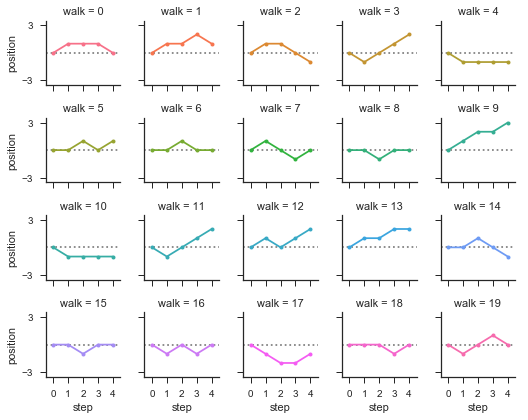

In [14]:
sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=5, size=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)